In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

cab_data = pd.read_csv('DataSets/Cab_Data.csv')
City = pd.read_csv('DataSets/City.csv')
Customer_ID = pd.read_csv('DataSets/Customer_ID.csv')
Transaction_ID = pd.read_csv('DataSets/Transaction_ID.csv')
US_Holiday_Dates = pd.read_csv('DataSets/US_Holiday_Dates.csv') 

In [2]:
#lets see what kind of data is exist for cab companies
cab_data.head(10)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776
5,10000016,42376,Pink Cab,ATLANTA GA,6.06,72.43,63.024
6,10000017,42372,Pink Cab,AUSTIN TX,44.00,576.15,475.200
7,10000018,42376,Pink Cab,AUSTIN TX,35.65,466.10,377.890
8,10000019,42381,Pink Cab,BOSTON MA,14.40,191.61,146.880
9,10000020,42375,Pink Cab,BOSTON MA,10.89,156.98,113.256


In [3]:
#lets review the each column
cab_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB


In [4]:
#lets see how many different records and variables there are in dataset
cab_data.shape

(359392, 7)

In [5]:
cab_data.dtypes

Transaction ID      int64
Date of Travel      int64
Company            object
City               object
KM Travelled      float64
Price Charged     float64
Cost of Trip      float64
dtype: object

In [6]:
#Except for the date of travel column, each columns has an acceptable datatype.

In [7]:
#lets see how many missing values ,if any, there are in dataset
missing_values = cab_data.isnull()

total_missing = missing_values.sum().sum()
print("Total missing values:", total_missing)

Total missing values: 0


In [8]:
#lets remove the spaces from column names first
cab_data = cab_data.rename(columns=lambda x: x.replace(' ', '_'))
cab_data.columns

Index(['Transaction_ID', 'Date_of_Travel', 'Company', 'City', 'KM_Travelled',
       'Price_Charged', 'Cost_of_Trip'],
      dtype='object')

In [9]:
# Retrieve the row with the maximum - minimum date value to see what kind of date formatting it has
max_date_value = cab_data['Date_of_Travel'].idxmax()
min_date_value = cab_data['Date_of_Travel'].idxmin()

row_with_max_date = cab_data.loc[max_date_value]
row_with_min_date = cab_data.loc[min_date_value]

In [10]:
print("Row with the maximum 'date' value:")
print(row_with_max_date)

Row with the maximum 'date' value:
Transaction_ID      10433076
Date_of_Travel         43465
Company             Pink Cab
City              ATLANTA GA
KM_Travelled           17.82
Price_Charged         238.62
Cost_of_Trip         190.674
Name: 353891, dtype: object


In [11]:
print("Row with the minimum 'date' value:")
print(row_with_min_date)

Row with the minimum 'date' value:
Transaction_ID      10000013
Date_of_Travel         42371
Company             Pink Cab
City              ATLANTA GA
KM_Travelled            9.04
Price_Charged          125.2
Cost_of_Trip          97.632
Name: 2, dtype: object


In [12]:
# Here, we can see that dataset uses a excel serial date format . let's change it to 'yyyy-mm-dd' format.
# 43465 (days) - 42371 (days) = 1094 (days) = 3 years
import datetime
from datetime import timedelta

def convert_excel_date(travel_dates):
    # Convert Excel serial date to a more acceptable date format
    base_date = datetime.datetime(1899, 12, 30)
    converted_dates = []

    for excel_serial_date in travel_dates:
        delta = timedelta(days=excel_serial_date)
        date_object = base_date + delta
        formatted_date = date_object.strftime("%Y-%m-%d")
        converted_dates.append(formatted_date)

    return converted_dates

travel_dates = cab_data['Date_of_Travel']
converted_dates = convert_excel_date(travel_dates)
cab_data['Date_of_Travel'] = converted_dates

cab_data.head(15)

,Transaction_ID,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776
5,10000016,2016-01-07,Pink Cab,ATLANTA GA,6.06,72.43,63.024
6,10000017,2016-01-03,Pink Cab,AUSTIN TX,44.00,576.15,475.200
7,10000018,2016-01-07,Pink Cab,AUSTIN TX,35.65,466.10,377.890
8,10000019,2016-01-12,Pink Cab,BOSTON MA,14.40,191.61,146.880
9,10000020,2016-01-06,Pink Cab,BOSTON MA,10.89,156.98,113.256


In [13]:
#since we have limited time interval( just 3 years), we should focus on more specific time intervals -e.g: months
cab_data['Date_of_Travel'] = pd.to_datetime(cab_data['Date_of_Travel'])

cab_data['Year'] = cab_data['Date_of_Travel'].dt.year
cab_data['Month'] = cab_data['Date_of_Travel'].dt.month

cab_data.drop('Date_of_Travel', axis=1, inplace=True)

In [14]:
cab_data.head(12)

,Transaction_ID,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Year,Month
0,10000011,Pink Cab,ATLANTA GA,30.45,370.95,313.635,2016,1
1,10000012,Pink Cab,ATLANTA GA,28.62,358.52,334.854,2016,1
2,10000013,Pink Cab,ATLANTA GA,9.04,125.20,97.632,2016,1
3,10000014,Pink Cab,ATLANTA GA,33.17,377.40,351.602,2016,1
4,10000015,Pink Cab,ATLANTA GA,8.73,114.62,97.776,2016,1
5,10000016,Pink Cab,ATLANTA GA,6.06,72.43,63.024,2016,1
6,10000017,Pink Cab,AUSTIN TX,44.00,576.15,475.200,2016,1
7,10000018,Pink Cab,AUSTIN TX,35.65,466.10,377.890,2016,1
8,10000019,Pink Cab,BOSTON MA,14.40,191.61,146.880,2016,1
9,10000020,Pink Cab,BOSTON MA,10.89,156.98,113.256,2016,1


In [15]:
#only 2 companies are exist. let's split dataset into yellow cab and pink cab for company-based analysis
Pink_Cab = cab_data[cab_data['Company']=='Pink Cab']
Yellow_Cab = cab_data[cab_data['Company']=='Yellow Cab']

In [16]:
#lets see the city dataset as well.
City.head(10)

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"
5,ORANGE COUNTY,"1,030,185","12,994"
6,SAN DIEGO CA,"959,307","69,995"
7,PHOENIX AZ,"943,999","6,133"
8,DALLAS TX,"942,908","22,157"
9,ATLANTA GA,"814,885","24,701"


In [17]:
## It only contains data regarding the city column which means that we can join these columns to the cab_data dataset based on 
# common cities in both dataset by then removing the city column in the obtained data later on.

In [18]:
City.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


In [19]:
City.shape

(20, 3)

In [20]:
City.columns

Index(['City', 'Population', 'Users'], dtype='object')

In [21]:
City.dtypes

City          object
Population    object
Users         object
dtype: object

In [22]:
#after joining the datasets, dtypes can be readjusted.

In [23]:
missing_values = City.isnull()

total_missing = missing_values.sum().sum()
print("Total missing values:", total_missing)

Total missing values: 0


In [24]:
#see the customer data as well
Customer_ID.head(10)

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536
5,27318,Male,25,13984
6,33788,Male,23,23788
7,34106,Male,19,19980
8,59799,Male,33,19271
9,57982,Male,57,5068


In [25]:
#income based joining can be done with this data later on

In [26]:
Customer_ID.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [27]:
Customer_ID.isnull().sum()

Customer ID           0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64

In [28]:
Customer_ID.dtypes

Customer ID            int64
Gender                object
Age                    int64
Income (USD/Month)     int64
dtype: object

In [29]:
Customer_ID.shape

(49171, 4)

In [30]:
#rename columns
Customer_ID = Customer_ID.rename(columns=lambda x: x.replace(' ', '_'))
Customer_ID = Customer_ID.rename(columns={'Income_(USD/Month)':'Income'})
Customer_ID.columns

Index(['Customer_ID', 'Gender', 'Age', 'Income'], dtype='object')

In [31]:
#see the total number of customers served by 2 companies
total_customer_number = len(Customer_ID['Customer_ID'].unique())
print("total number of customers served by both companies ")
total_customer_number

total number of customers served by both companies 


49171

In [32]:
#see the details of transactions as well.
Transaction_ID.head(10)

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card
5,10000016,27318,Cash
6,10000017,33788,Card
7,10000018,34106,Card
8,10000019,59799,Cash
9,10000020,57982,Cash


In [33]:
Transaction_ID.shape

(440098, 3)

In [34]:
Transaction_ID.dtypes

Transaction ID     int64
Customer ID        int64
Payment_Mode      object
dtype: object

In [35]:
Transaction_ID.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


In [36]:
#rename columns
Transaction_ID = Transaction_ID.rename(columns=lambda x: x.replace(' ', '_'))
Transaction_ID.columns

Index(['Transaction_ID', 'Customer_ID', 'Payment_Mode'], dtype='object')

In [37]:
total_number_of_transactions = len(Transaction_ID['Transaction_ID'].unique())
print("total number of transactions : ")
total_number_of_transactions

total number of transactions : 


440098

In [38]:
#to see the effect of holidays onto the transaction number, lets see holiday data in the US as well.
US_Holiday_Dates.head(10)

,Date,Holiday,WeekDay,Month,Day,Year
0,2004-07-04,4th of July,Sunday,7,4,2004
1,2005-07-04,4th of July,Monday,7,4,2005
2,2006-07-04,4th of July,Tuesday,7,4,2006
3,2007-07-04,4th of July,Wednesday,7,4,2007
4,2008-07-04,4th of July,Friday,7,4,2008
5,2009-07-04,4th of July,Saturday,7,4,2009
6,2010-07-04,4th of July,Sunday,7,4,2010
7,2011-07-04,4th of July,Monday,7,4,2011
8,2012-07-04,4th of July,Wednesday,7,4,2012
9,2013-07-04,4th of July,Thursday,7,4,2013


In [39]:
#grouping by month, we can find the total number of holidays exist in each month that can be helpful 
#during investment decision-making

In [40]:
US_Holiday_Dates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342 entries, 0 to 341
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Date     342 non-null    object
 1   Holiday  342 non-null    object
 2   WeekDay  342 non-null    object
 3   Month    342 non-null    int64 
 4   Day      342 non-null    int64 
 5   Year     342 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 16.2+ KB


In [41]:
US_Holiday_Dates.dtypes

Date       object
Holiday    object
WeekDay    object
Month       int64
Day         int64
Year        int64
dtype: object

In [42]:
#now lets see how many holidays are exist in each month during the years when data is obtained.
years = [2016, 2017, 2018]
for year in years:
    df_year = US_Holiday_Dates[(US_Holiday_Dates['Year'] == year) & (US_Holiday_Dates['Month'].notnull())]
    holidays_per_month = df_year.groupby('Month')['Month'].count()
    
    print(f"Year {year}:")
    print(holidays_per_month)
    print()

Year 2016:
Month
1     2
2     2
3     1
5     2
6     1
7     1
9     3
10    1
11    3
12    3
Name: Month, dtype: int64

Year 2017:
Month
1     2
2     2
4     2
5     1
6     1
7     1
9     3
10    1
11    3
12    3
Name: Month, dtype: int64

Year 2018:
Month
1     2
2     2
4     2
5     1
6     1
7     1
9     3
10    1
11    3
12    3
Name: Month, dtype: int64



In [43]:
#we can see that last 2 months (11 - 12) are the months that has the most holiday.
#now lets see if that has an impact on the number of total transactions done by both companies for each month in 3 years.

In [44]:
#lets start with yellow cab company.
transactions_per_month_yellow_cab = cab_data[cab_data.Company=='Yellow Cab'].groupby(['Month']).Transaction_ID.count()
transactions_per_month_yellow_cab

Month
1     18117
2     14932
3     17423
4     17351
5     18741
6     18836
7     21086
8     23584
9     27201
10    30276
11    31695
12    35439
Name: Transaction_ID, dtype: int64

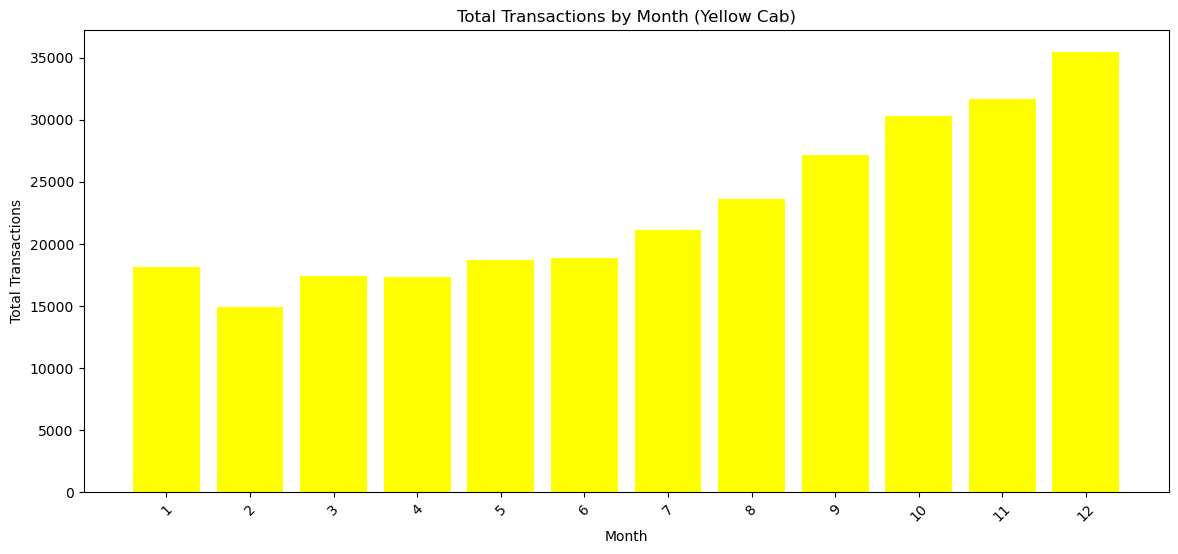

In [45]:
plt.figure(figsize=(14, 6))
plt.bar(transactions_per_month_yellow_cab.index, transactions_per_month_yellow_cab.values, color = 'yellow' ) 
plt.xlabel('Month')
plt.ylabel('Total Transactions')
plt.title('Total Transactions by Month (Yellow Cab)')
plt.xticks(transactions_per_month_yellow_cab.index, rotation = 45) 
plt.show()

In [46]:
#now the pink cab company.
transactions_per_month_pink_cab = cab_data[cab_data.Company=='Pink Cab'].groupby(['Month']).Transaction_ID.count()
transactions_per_month_pink_cab

Month
1      5057
2      3375
3      4223
4      4083
5      4960
6      5877
7      6590
8      7739
9      9658
10    10576
11    11005
12    11568
Name: Transaction_ID, dtype: int64

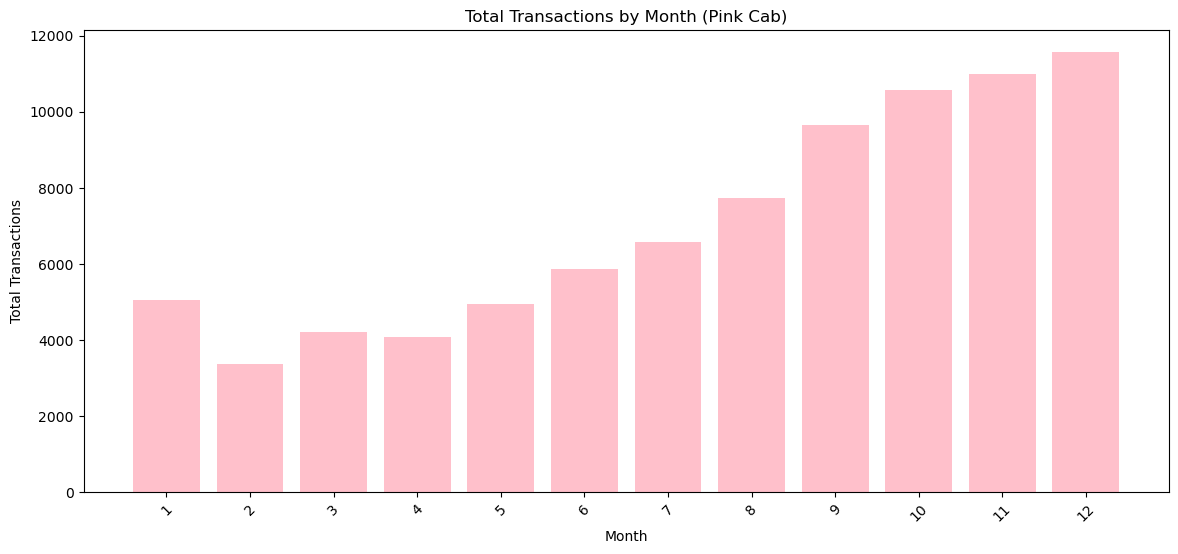

In [47]:
plt.figure(figsize=(14, 6))
plt.bar(transactions_per_month_pink_cab.index, transactions_per_month_pink_cab.values, color = 'pink' ) 
plt.xlabel('Month')
plt.ylabel('Total Transactions')
plt.title('Total Transactions by Month (Pink Cab)')
plt.xticks(transactions_per_month_pink_cab.index, rotation = 45)
plt.show()

In [48]:
#In the most active holiday season of the US (months 11-november, 12-december), yellow cab company outnumbered (~35000) the 
#total transactions done by the pink cab company (~11500). Both company has peak number of transactions in month 12.

In [49]:
# now,lets see the statistics of how many KMs is travelled in total in 3 years by both companies
total_distance = cab_data['KM_Travelled'].describe()
total_distance

count    359392.000000
mean         22.567254
std          12.233526
min           1.900000
25%          12.000000
50%          22.440000
75%          32.960000
max          48.000000
Name: KM_Travelled, dtype: float64

In [50]:
#now lets try to see it seperately for both companies to see which one is more active
yellow_cab_travel = Yellow_Cab['KM_Travelled'].describe()
pink_cab_travel = Pink_Cab['KM_Travelled'].describe()

In [51]:
comparison_of_travels = pd.DataFrame({
    'Yellow Cab': yellow_cab_travel,
    'Pink Cab': pink_cab_travel
})

comparison_of_travels

,Yellow Cab,Pink Cab
count,274681.000000,84711.000000
mean,22.569517,22.559917
std,12.234298,12.231092
min,1.900000,1.900000
25%,11.990000,12.000000
50%,22.440000,22.440000
75%,32.960000,32.960000
max,48.000000,48.000000


In [52]:
#lets add the total distance taken by both companies as well to make comparison easier.
comparison_of_travels['Total'] = total_distance
comparison_of_travels

,Yellow Cab,Pink Cab,Total
count,274681.000000,84711.000000,359392.000000
mean,22.569517,22.559917,22.567254
std,12.234298,12.231092,12.233526
min,1.900000,1.900000,1.900000
25%,11.990000,12.000000,12.000000
50%,22.440000,22.440000,22.440000
75%,32.960000,32.960000,32.960000
max,48.000000,48.000000,48.000000


In [53]:
#now let's see the distribution of how many KM is travelled with which frequency. 
# --> (in total, how many transactions for 5  km of distance )
# -->     "         "          "       "   10 km  "     "
# ...

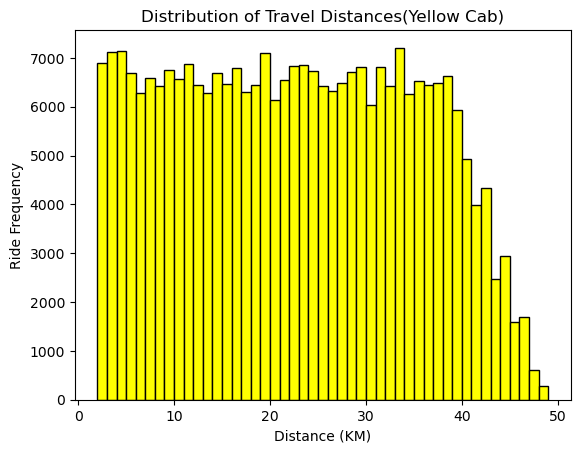

In [54]:
#yellow cab's travel distance distribution
plt.hist(Yellow_Cab['KM_Travelled'], bins=range(2, 50), edgecolor='black', color='yellow')
plt.xlabel('Distance (KM)')
plt.ylabel('Ride Frequency')
plt.title('Distribution of Travel Distances(Yellow Cab)')
plt.show()

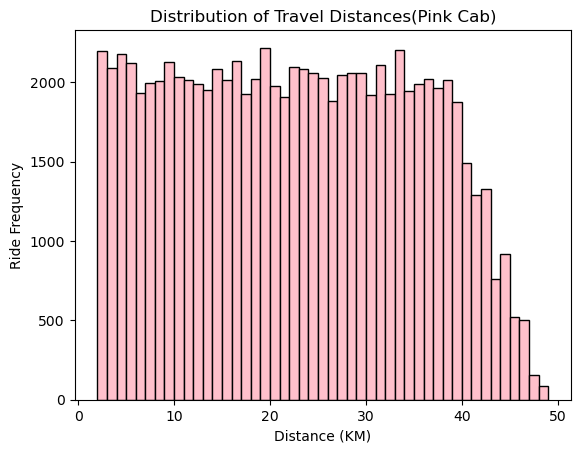

In [55]:
#pink cab's travel distribution
plt.hist(Pink_Cab['KM_Travelled'], bins=range(2, 50), edgecolor='black', color='pink')
plt.xlabel('Distance (KM)')
plt.ylabel('Ride Frequency')
plt.title('Distribution of Travel Distances(Pink Cab)')
plt.show()

In [56]:
# for both companies all rides are between 2 - 48 KM
# both companies perform more rides in short and middle-level distances(  2 - 40 KM  )

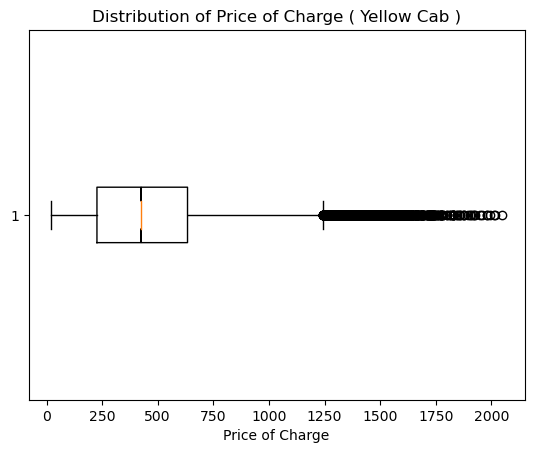

In [57]:
# now, lets see the frequency of how much price is charged for the rides in yellow cab including the exceptions.
plt.boxplot(Yellow_Cab['Price_Charged'], vert=False, notch=True, sym='o')
plt.xlabel('Price of Charge')
plt.title('Distribution of Price of Charge ( Yellow Cab )')
plt.show()

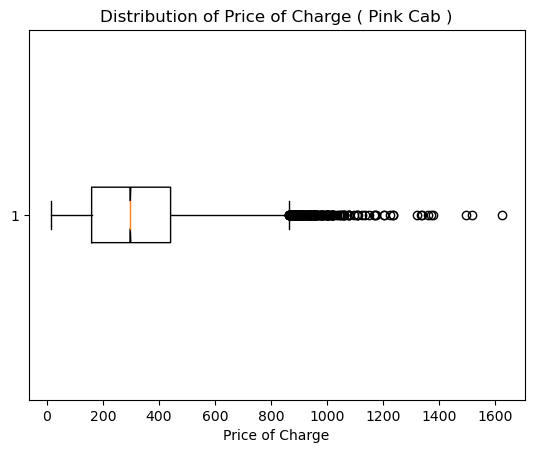

In [58]:
plt.boxplot(Pink_Cab['Price_Charged'], vert=False, notch=True, sym='o')
plt.xlabel('Price of Charge')
plt.title('Distribution of Price of Charge ( Pink Cab )')
plt.show()

In [59]:
#to see and compare them easier, lets visualize them in a single graph

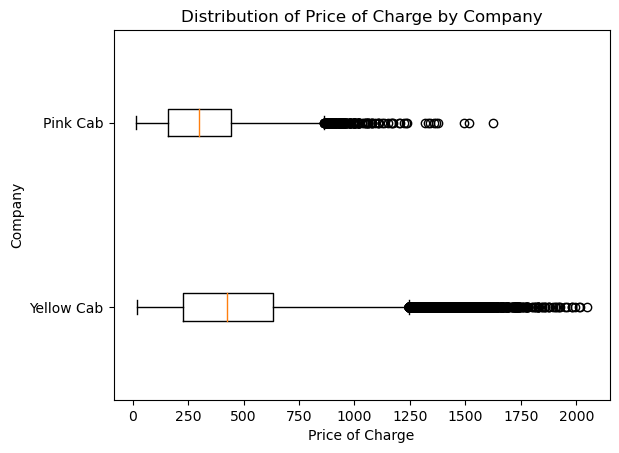

In [60]:
yellow_cab_price = Yellow_Cab['Price_Charged']
pink_cab_price = Pink_Cab['Price_Charged']

# Creating a figure and axis object
fig, ax = plt.subplots()

# Plotting the box plots
ax.boxplot([yellow_cab_price, pink_cab_price], labels=['Yellow Cab', 'Pink Cab'],vert=False)

# Adding labels and title
ax.set_xlabel('Price of Charge')
ax.set_ylabel('Company')
ax.set_title('Distribution of Price of Charge by Company')

# Displaying the plot
plt.show()

In [61]:
#we can see that while the minimum price of charges are same for both company, maximum charge is higher in yellow cab company. 
# in yellow cab company, a price between 200 - 650 $ is mostly paid while 150 - 450 $ is paid in pink cab company.

In [62]:
#now lets see how much impact does the distance has on prices

In [63]:
cab_data.head()

,Transaction_ID,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Year,Month
0,10000011,Pink Cab,ATLANTA GA,30.45,370.95,313.635,2016,1
1,10000012,Pink Cab,ATLANTA GA,28.62,358.52,334.854,2016,1
2,10000013,Pink Cab,ATLANTA GA,9.04,125.20,97.632,2016,1
3,10000014,Pink Cab,ATLANTA GA,33.17,377.40,351.602,2016,1
4,10000015,Pink Cab,ATLANTA GA,8.73,114.62,97.776,2016,1


C:\Users\BatuhanYILMAZ\AppData\Local\Temp\ipykernel_5300\3245963078.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=0, fontsize=15)
C:\Users\BatuhanYILMAZ\AppData\Local\Temp\ipykernel_5300\3245963078.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=0, fontsize=15)


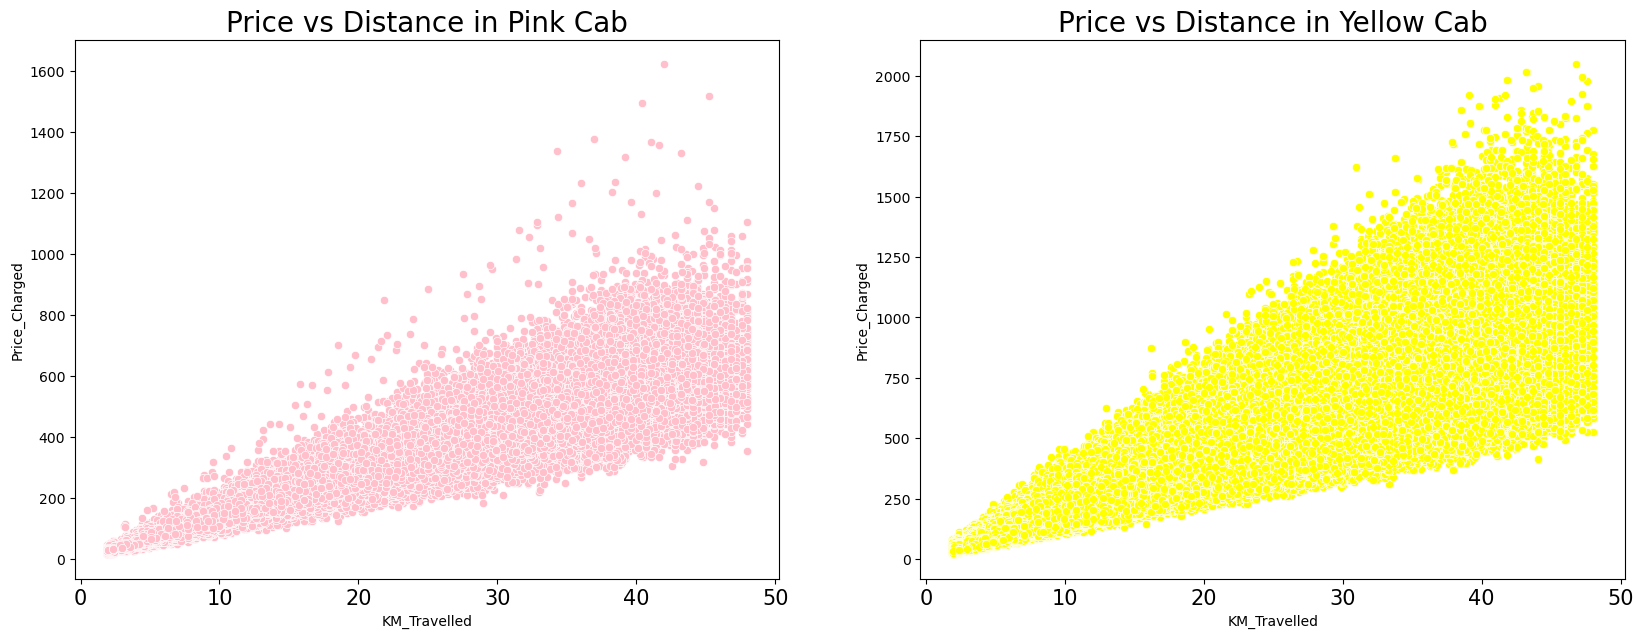

In [64]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 7))
sns.scatterplot(data=Pink_Cab, x='KM_Travelled', y='Price_Charged', ax=ax1 , color = 'pink')
ax1.set_title('Price vs Distance in Pink Cab', fontsize=20)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=0, fontsize=15)
sns.scatterplot(data=Yellow_Cab, x='KM_Travelled', y='Price_Charged', ax=ax2, color = 'yellow')
ax2.set_title('Price vs Distance in Yellow Cab', fontsize=20)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=0, fontsize=15)
plt.show()

In [65]:
#yellow cab company charges more price than the pink company

In [66]:
cab_data.head()

,Transaction_ID,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Year,Month
0,10000011,Pink Cab,ATLANTA GA,30.45,370.95,313.635,2016,1
1,10000012,Pink Cab,ATLANTA GA,28.62,358.52,334.854,2016,1
2,10000013,Pink Cab,ATLANTA GA,9.04,125.20,97.632,2016,1
3,10000014,Pink Cab,ATLANTA GA,33.17,377.40,351.602,2016,1
4,10000015,Pink Cab,ATLANTA GA,8.73,114.62,97.776,2016,1


In [67]:
#lets see the total number of transactions by each company for each year.
yellow_cab_transaction_counts = Yellow_Cab['Year'].value_counts()
yellow_cab_transaction_counts

2017    98189
2018    94253
2016    82239
Name: Year, dtype: int64

In [68]:
pink_cab_transaction_counts = Pink_Cab['Year'].value_counts()
pink_cab_transaction_counts

2017    30321
2018    29310
2016    25080
Name: Year, dtype: int64

In [69]:
# Extracting the years and transaction counts for Yellow Cab
yellow_cab_years = yellow_cab_transaction_counts.index
yellow_cab_counts = yellow_cab_transaction_counts.values

# Extracting the years and transaction counts for Pink Cab
pink_cab_years = pink_cab_transaction_counts.index
pink_cab_counts = pink_cab_transaction_counts.values

yellow_cab_years_sorted = sorted(yellow_cab_years)
pink_cab_years_sorted = sorted(pink_cab_years)

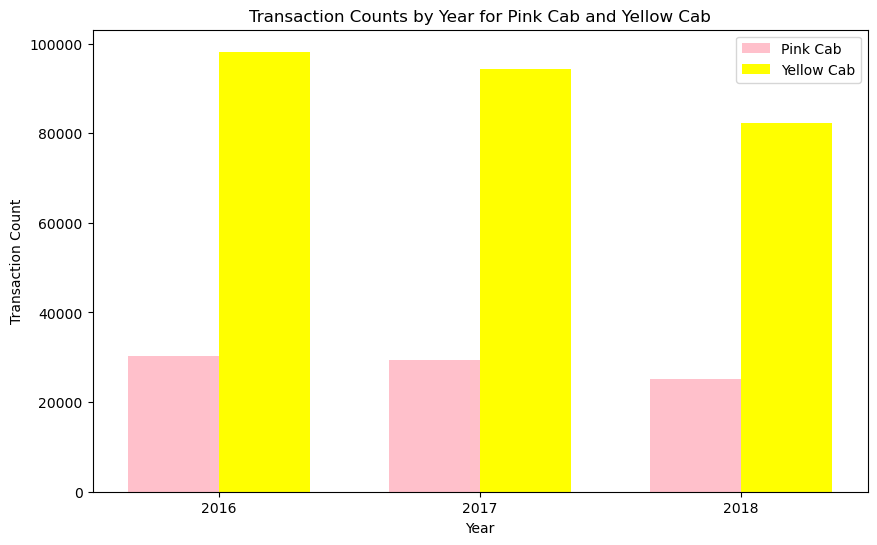

In [70]:
# Sort the years in ascending order
yellow_cab_years_sorted = sorted(yellow_cab_years)
pink_cab_years_sorted = sorted(pink_cab_years)

bar_width = 0.35

r1 = np.arange(len(yellow_cab_years_sorted))
r2 = [x + bar_width for x in r1]

plt.figure(figsize=(10, 6))
plt.bar(r1, pink_cab_counts, width=bar_width, label='Pink Cab', color='pink')
plt.bar(r2, yellow_cab_counts, width=bar_width, label='Yellow Cab', color='yellow')

plt.xlabel('Year')
plt.ylabel('Transaction Count')
plt.title('Transaction Counts by Year for Pink Cab and Yellow Cab')
plt.xticks([r + bar_width/2 for r in range(len(yellow_cab_years_sorted))], yellow_cab_years_sorted)
plt.legend()
plt.show()

In [71]:
#yellow cab company has more transactions than pink cab company all the time
Customer_ID = pd.read_csv('DataSets/Customer_ID.csv')
Transaction_ID = pd.read_csv('DataSets/Transaction_ID.csv')
US_Holiday_Dates = pd.read_csv('DataSets/US_Holiday_Dates.csv') 

In [72]:
#now, lets compare the cost of the price and price charged to the related ride for each company.
yellow_cab_cost = Yellow_Cab.groupby('Year')['Cost_of_Trip'].mean()
yellow_cab_cost

Year
2016    298.570481
2017    297.822893
2018    297.459436
Name: Cost_of_Trip, dtype: float64

In [73]:
yellow_cab_price = Yellow_Cab.groupby('Year')['Price_Charged'].mean()
yellow_cab_price

Year
2016    467.918301
2017    466.639950
2018    440.875558
Name: Price_Charged, dtype: float64

In [74]:
pink_cab_cost = Pink_Cab.groupby('Year')['Cost_of_Trip'].mean()
pink_cab_cost

Year
2016    247.008294
2017    248.836603
2018    248.412841
Name: Cost_of_Trip, dtype: float64

In [75]:
pink_cab_price = Pink_Cab.groupby('Year')['Price_Charged'].mean()
pink_cab_price

Year
2016    315.330113
2017    315.907442
2018    301.642530
Name: Price_Charged, dtype: float64

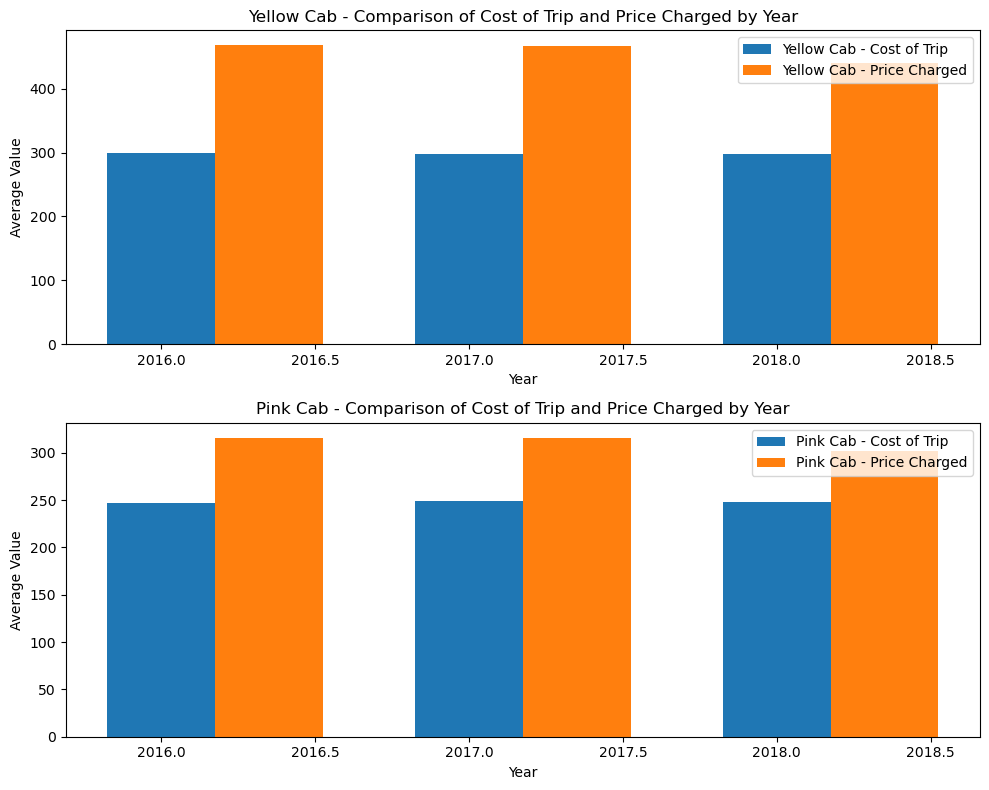

In [76]:
#lets visualize this profit difference
yellow_cab_cost = Yellow_Cab.groupby('Year')['Cost_of_Trip'].mean()
yellow_cab_price = Yellow_Cab.groupby('Year')['Price_Charged'].mean()

# Calculate the average cost of the trip and price charged for each year for Pink Cab
pink_cab_cost = Pink_Cab.groupby('Year')['Cost_of_Trip'].mean()
pink_cab_price = Pink_Cab.groupby('Year')['Price_Charged'].mean()

# Set the width of the bars
bar_width = 0.35

# Generate separate bar plots for Pink Cab and Yellow Cab
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Plotting for Yellow Cab
ax1.bar(yellow_cab_cost.index, yellow_cab_cost, bar_width, label='Yellow Cab - Cost of Trip')
ax1.bar(yellow_cab_price.index + bar_width, yellow_cab_price, bar_width, label='Yellow Cab - Price Charged')
ax1.set_xlabel('Year')
ax1.set_ylabel('Average Value')
ax1.set_title('Yellow Cab - Comparison of Cost of Trip and Price Charged by Year')
ax1.legend()

# Plotting for Pink Cab
ax2.bar(pink_cab_cost.index, pink_cab_cost, bar_width, label='Pink Cab - Cost of Trip')
ax2.bar(pink_cab_price.index + bar_width, pink_cab_price, bar_width, label='Pink Cab - Price Charged')
ax2.set_xlabel('Year')
ax2.set_ylabel('Average Value')
ax2.set_title('Pink Cab - Comparison of Cost of Trip and Price Charged by Year')
ax2.legend()

plt.tight_layout()
plt.show()

In [77]:
#we see that average yearly profit margin of the yellow cab company is more than the pink cab company's.

In [78]:
#now, lets see how much cost is charged for rides according to the location.

C:\Users\BatuhanYILMAZ\AppData\Local\Temp\ipykernel_5300\334986200.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', num_cities)
C:\Users\BatuhanYILMAZ\AppData\Local\Temp\ipykernel_5300\334986200.py:13: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax1.scatter(city_data['KM_Travelled'], city_data['Cost_of_Trip'], c=colors(i), label=city)
C:\Users\BatuhanYILMAZ\AppData\Local\Temp\ipykernel_5300\334986200.py:25: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be

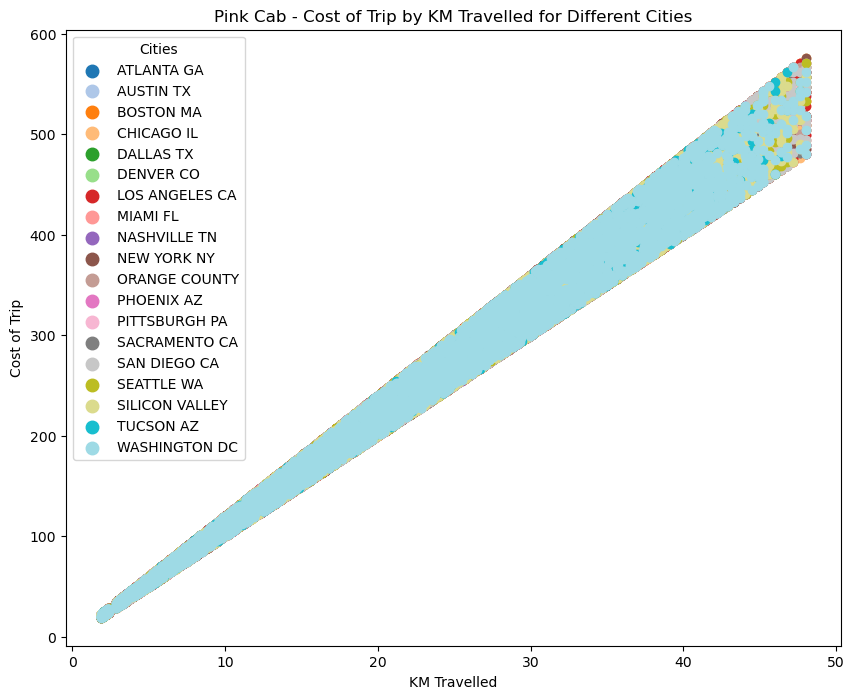

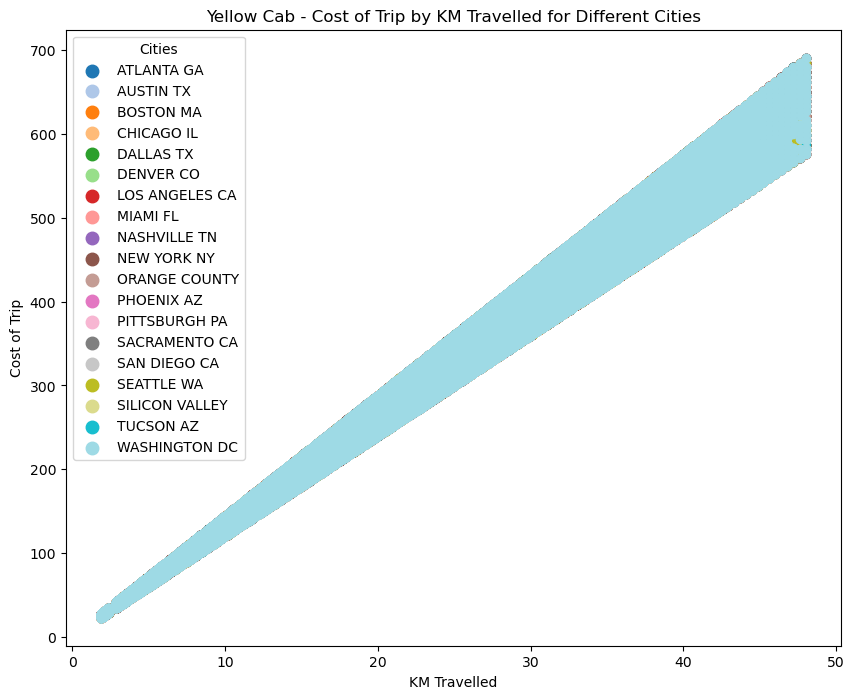

In [79]:
# Get unique cities in the dataset
cities = cab_data['City'].unique()

# Create a colormap with a unique color for each city
num_cities = len(cities)
colors = plt.cm.get_cmap('tab20', num_cities)

# Create scatter plot for Pink Cab
fig, ax1 = plt.subplots(figsize=(10, 8))

for i, city in enumerate(Pink_Cab['City'].unique()):
    city_data = Pink_Cab[Pink_Cab['City'] == city]
    ax1.scatter(city_data['KM_Travelled'], city_data['Cost_of_Trip'], c=colors(i), label=city)

ax1.set_xlabel('KM Travelled')
ax1.set_ylabel('Cost of Trip')
ax1.set_title('Pink Cab - Cost of Trip by KM Travelled for Different Cities')
ax1.legend(title='Cities', markerscale=1.5)

# Create scatter plot for Yellow Cab
fig, ax2 = plt.subplots(figsize=(10, 8))

for i, city in enumerate(Yellow_Cab['City'].unique()):
    city_data = Yellow_Cab[Yellow_Cab['City'] == city]
    ax2.scatter(city_data['KM_Travelled'], city_data['Cost_of_Trip'], c=colors(i), label=city)

ax2.set_xlabel('KM Travelled')
ax2.set_ylabel('Cost of Trip')
ax2.set_title('Yellow Cab - Cost of Trip by KM Travelled for Different Cities')
ax2.legend(title='Cities', markerscale=1.5)

plt.show()

In [80]:
#even though it is hard to distinguish the colors clearly, cost of trip distribution according to the cities
#are almost same for both companies. so decided to keep the graph like it is now 

In [81]:
#now lets do the same process to see how much money companies charges to their customers according to the locations.

C:\Users\BatuhanYILMAZ\AppData\Local\Temp\ipykernel_5300\2102508399.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', num_cities)
C:\Users\BatuhanYILMAZ\AppData\Local\Temp\ipykernel_5300\2102508399.py:8: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax1.scatter(city_data['KM_Travelled'], city_data['Price_Charged'], c=colors(i), label=city)
C:\Users\BatuhanYILMAZ\AppData\Local\Temp\ipykernel_5300\2102508399.py:20: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should

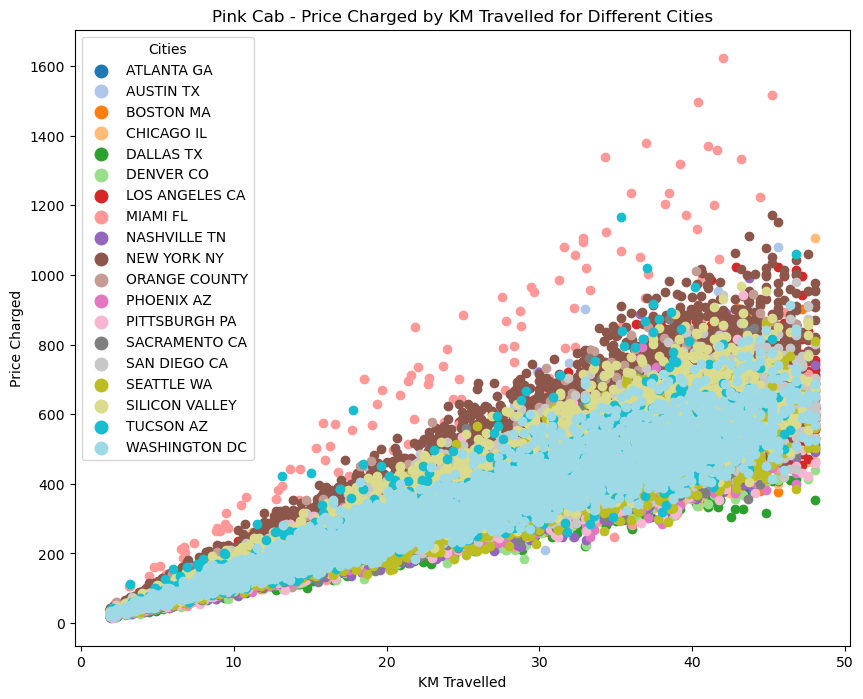

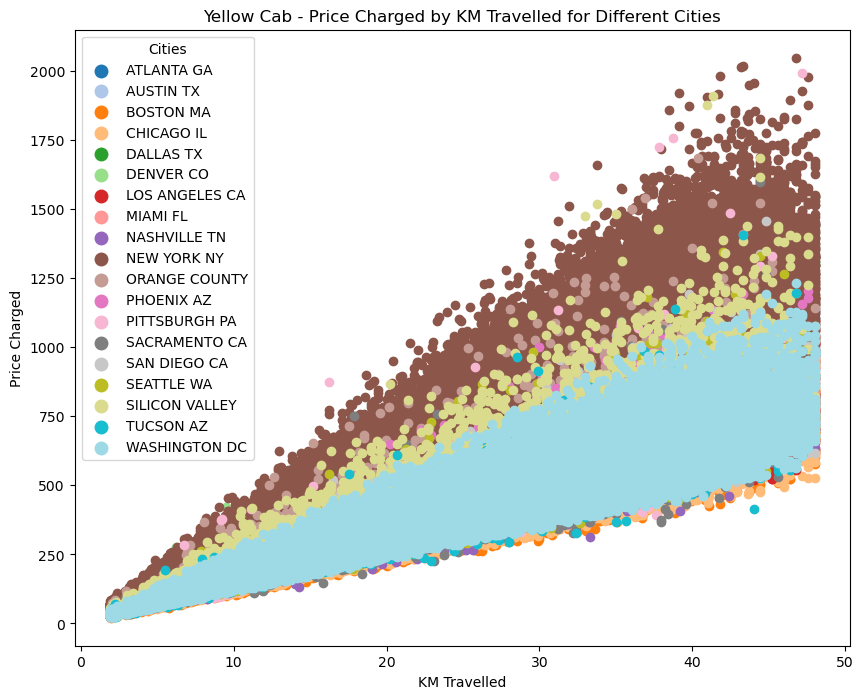

In [82]:
num_cities = len(cities)
colors = plt.cm.get_cmap('tab20', num_cities)

fig, ax1 = plt.subplots(figsize=(10, 8))

for i, city in enumerate(Pink_Cab['City'].unique()):
    city_data = Pink_Cab[Pink_Cab['City'] == city]
    ax1.scatter(city_data['KM_Travelled'], city_data['Price_Charged'], c=colors(i), label=city)

ax1.set_xlabel('KM Travelled')
ax1.set_ylabel('Price Charged')
ax1.set_title('Pink Cab - Price Charged by KM Travelled for Different Cities')
ax1.legend(title='Cities', markerscale=1.5)

# Create scatter plot for Yellow Cab
fig, ax2 = plt.subplots(figsize=(10, 8))

for i, city in enumerate(Yellow_Cab['City'].unique()):
    city_data = Yellow_Cab[Yellow_Cab['City'] == city]
    ax2.scatter(city_data['KM_Travelled'], city_data['Price_Charged'], c=colors(i), label=city)

ax2.set_xlabel('KM Travelled')
ax2.set_ylabel('Price Charged')
ax2.set_title('Yellow Cab - Price Charged by KM Travelled for Different Cities')
ax2.legend(title='Cities', markerscale=1.5)

plt.show()

In [83]:
#we see that charged price in NY City is always more in the yellow cab company than that of the pink cab company.
#in pink cab company, except for the outliers, price tends to increase with respect to the distance.

In [84]:
#now, lets review the data again and create the master data.

In [85]:
cab_data.head()

,Transaction_ID,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Year,Month
0,10000011,Pink Cab,ATLANTA GA,30.45,370.95,313.635,2016,1
1,10000012,Pink Cab,ATLANTA GA,28.62,358.52,334.854,2016,1
2,10000013,Pink Cab,ATLANTA GA,9.04,125.20,97.632,2016,1
3,10000014,Pink Cab,ATLANTA GA,33.17,377.40,351.602,2016,1
4,10000015,Pink Cab,ATLANTA GA,8.73,114.62,97.776,2016,1


In [86]:
City.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [87]:
Customer_ID = Customer_ID.rename(columns=lambda x: x.replace(' ', '_'))
Customer_ID.head()

,Customer_ID,Gender,Age,Income_(USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [88]:
Transaction_ID = Transaction_ID.rename(columns=lambda x: x.replace(' ', '_'))
Transaction_ID.head()

,Transaction_ID,Customer_ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [89]:
#lets start with transaction_ID data by taking the Transaction_ID column as the common one for joining.
left = cab_data.set_index(['Transaction_ID'])
right = Transaction_ID.set_index(['Transaction_ID'])
data = left.join(right)
data

,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Year,Month,Customer_ID,Payment_Mode
Transaction_ID,,,,,,,,,
10000011,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,2016,1,29290,Card
10000012,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,2016,1,27703,Card
10000013,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,2016,1,28712,Cash
10000014,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,2016,1,28020,Cash
10000015,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,2016,1,27182,Card
...,...,...,...,...,...,...,...,...,...
10440101,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,2018,1,52392,Cash
10440104,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,2018,1,53286,Cash
10440105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,2018,1,52265,Cash


In [90]:
#now, lets do it for Customer_ID data by taking the Customer_ID column as the common one for joining.
left = data.set_index([data.index,'Customer_ID'])
right = Customer_ID.set_index(['Customer_ID'])
data = left.join(right)
data

,,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Year,Month,Payment_Mode,Gender,Age,Income_(USD/Month)
Transaction_ID,Customer_ID,,,,,,,,,,,
10000011,29290,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,2016,1,Card,Male,28,10813
10000012,27703,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,2016,1,Card,Male,27,9237
10000013,28712,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,2016,1,Cash,Male,53,11242
10000014,28020,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,2016,1,Cash,Male,23,23327
10000015,27182,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,2016,1,Card,Male,33,8536
...,...,...,...,...,...,...,...,...,...,...,...,...
10440101,52392,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,2018,1,Cash,Male,24,15651
10440104,53286,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,2018,1,Cash,Male,32,6528
10440105,52265,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,2018,1,Cash,Male,56,7966


In [91]:
#now, same for the city dataset
left = data.set_index([data.index,'City'])
right = City.set_index(['City'])
master_data = left.join(right)
master_data

,,,Company,KM_Travelled,Price_Charged,Cost_of_Trip,Year,Month,Payment_Mode,Gender,Age,Income_(USD/Month),Population,Users
Transaction_ID,Customer_ID,City,,,,,,,,,,,,
10000011,29290,ATLANTA GA,Pink Cab,30.45,370.95,313.6350,2016,1,Card,Male,28,10813,"814,885","24,701"
10000012,27703,ATLANTA GA,Pink Cab,28.62,358.52,334.8540,2016,1,Card,Male,27,9237,"814,885","24,701"
10000013,28712,ATLANTA GA,Pink Cab,9.04,125.20,97.6320,2016,1,Cash,Male,53,11242,"814,885","24,701"
10000014,28020,ATLANTA GA,Pink Cab,33.17,377.40,351.6020,2016,1,Cash,Male,23,23327,"814,885","24,701"
10000015,27182,ATLANTA GA,Pink Cab,8.73,114.62,97.7760,2016,1,Card,Male,33,8536,"814,885","24,701"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10440101,52392,WASHINGTON DC,Yellow Cab,4.80,69.24,63.3600,2018,1,Cash,Male,24,15651,"418,859","127,001"
10440104,53286,WASHINGTON DC,Yellow Cab,8.40,113.75,106.8480,2018,1,Cash,Male,32,6528,"418,859","127,001"
10440105,52265,WASHINGTON DC,Yellow Cab,27.75,437.07,349.6500,2018,1,Cash,Male,56,7966,"418,859","127,001"


In [92]:
master_data = master_data.reset_index()

In [93]:
master_data.head()

,Transaction_ID,Customer_ID,City,Company,KM_Travelled,Price_Charged,Cost_of_Trip,Year,Month,Payment_Mode,Gender,Age,Income_(USD/Month),Population,Users
0,10000011,29290,ATLANTA GA,Pink Cab,30.45,370.95,313.635,2016,1,Card,Male,28,10813,"814,885","24,701"
1,10000012,27703,ATLANTA GA,Pink Cab,28.62,358.52,334.854,2016,1,Card,Male,27,9237,"814,885","24,701"
2,10000013,28712,ATLANTA GA,Pink Cab,9.04,125.20,97.632,2016,1,Cash,Male,53,11242,"814,885","24,701"
3,10000014,28020,ATLANTA GA,Pink Cab,33.17,377.40,351.602,2016,1,Cash,Male,23,23327,"814,885","24,701"
4,10000015,27182,ATLANTA GA,Pink Cab,8.73,114.62,97.776,2016,1,Card,Male,33,8536,"814,885","24,701"


In [94]:
#our master data is almost ready, lets modify the column names to make it easier to work with later on.
master_data = master_data.rename(columns={'Income_(USD/Month)':'Income'})
master_data.head(10)

,Transaction_ID,Customer_ID,City,Company,KM_Travelled,Price_Charged,Cost_of_Trip,Year,Month,Payment_Mode,Gender,Age,Income,Population,Users
0,10000011,29290,ATLANTA GA,Pink Cab,30.45,370.95,313.635,2016,1,Card,Male,28,10813,"814,885","24,701"
1,10000012,27703,ATLANTA GA,Pink Cab,28.62,358.52,334.854,2016,1,Card,Male,27,9237,"814,885","24,701"
2,10000013,28712,ATLANTA GA,Pink Cab,9.04,125.20,97.632,2016,1,Cash,Male,53,11242,"814,885","24,701"
3,10000014,28020,ATLANTA GA,Pink Cab,33.17,377.40,351.602,2016,1,Cash,Male,23,23327,"814,885","24,701"
4,10000015,27182,ATLANTA GA,Pink Cab,8.73,114.62,97.776,2016,1,Card,Male,33,8536,"814,885","24,701"
5,10000016,27318,ATLANTA GA,Pink Cab,6.06,72.43,63.024,2016,1,Cash,Male,25,13984,"814,885","24,701"
6,10000017,33788,AUSTIN TX,Pink Cab,44.00,576.15,475.200,2016,1,Card,Male,23,23788,"698,371","14,978"
7,10000018,34106,AUSTIN TX,Pink Cab,35.65,466.10,377.890,2016,1,Card,Male,19,19980,"698,371","14,978"
8,10000019,59799,BOSTON MA,Pink Cab,14.40,191.61,146.880,2016,1,Cash,Male,33,19271,"248,968","80,021"
9,10000020,57982,BOSTON MA,Pink Cab,10.89,156.98,113.256,2016,1,Cash,Male,57,5068,"248,968","80,021"


In [95]:
#now, by taking advantage of the data from other sets, we can find out how many users are active from each city.
city_users = master_data.groupby('City').Users.count()
city_users

City
ATLANTA GA         7557
AUSTIN TX          4896
BOSTON MA         29692
CHICAGO IL        56625
DALLAS TX          7017
DENVER CO          3825
LOS ANGELES CA    48033
MIAMI FL           6454
NASHVILLE TN       3010
NEW YORK NY       99885
ORANGE COUNTY      3982
PHOENIX AZ         2064
PITTSBURGH PA      1313
SACRAMENTO CA      2367
SAN DIEGO CA      20488
SEATTLE WA         7997
SILICON VALLEY     8519
TUCSON AZ          1931
WASHINGTON DC     43737
Name: Users, dtype: int64

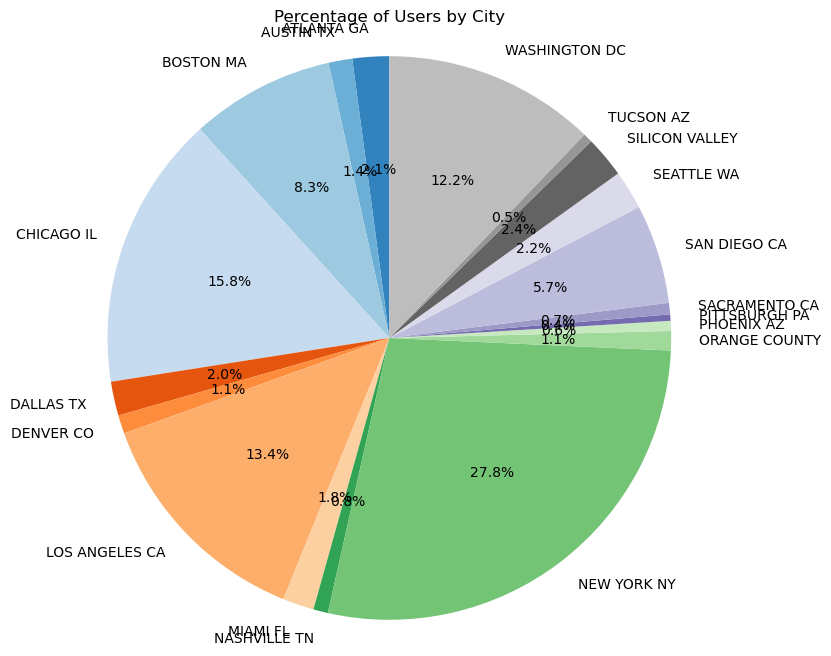

In [96]:
#lets visualize the city activity percentage based on users
fig, ax = plt.subplots(figsize=(8, 8))
colors = plt.cm.tab20c(range(len(city_users)))
ax.pie(city_users, labels=city_users.index, colors=colors, autopct='%1.1f%%', startangle=90)
ax.set_title('Percentage of Users by City')
plt.axis('equal') 

plt.show()

In [97]:
#we see that most customers come from NEW YORK, as second from Chicago and Los angeles as third most active city followed by 
#washington dc

In [98]:
#now, lets see the user count for the companies seperately.
city_yellow_cab = master_data[master_data.Company=='Yellow Cab'].groupby('City').Transaction_ID.count()
city_yellow_cab

City
ATLANTA GA         5795
AUSTIN TX          3028
BOSTON MA         24506
CHICAGO IL        47264
DALLAS TX          5637
DENVER CO          2431
LOS ANGELES CA    28168
MIAMI FL           4452
NASHVILLE TN       1169
NEW YORK NY       85918
ORANGE COUNTY      2469
PHOENIX AZ         1200
PITTSBURGH PA       631
SACRAMENTO CA      1033
SAN DIEGO CA       9816
SEATTLE WA         5265
SILICON VALLEY     4722
TUCSON AZ          1132
WASHINGTON DC     40045
Name: Transaction_ID, dtype: int64

In [99]:
#and for the pink cab company.
city_pink_cab = master_data[master_data.Company=='Pink Cab'].groupby('City').Transaction_ID.count()
city_pink_cab

City
ATLANTA GA         1762
AUSTIN TX          1868
BOSTON MA          5186
CHICAGO IL         9361
DALLAS TX          1380
DENVER CO          1394
LOS ANGELES CA    19865
MIAMI FL           2002
NASHVILLE TN       1841
NEW YORK NY       13967
ORANGE COUNTY      1513
PHOENIX AZ          864
PITTSBURGH PA       682
SACRAMENTO CA      1334
SAN DIEGO CA      10672
SEATTLE WA         2732
SILICON VALLEY     3797
TUCSON AZ           799
WASHINGTON DC      3692
Name: Transaction_ID, dtype: int64

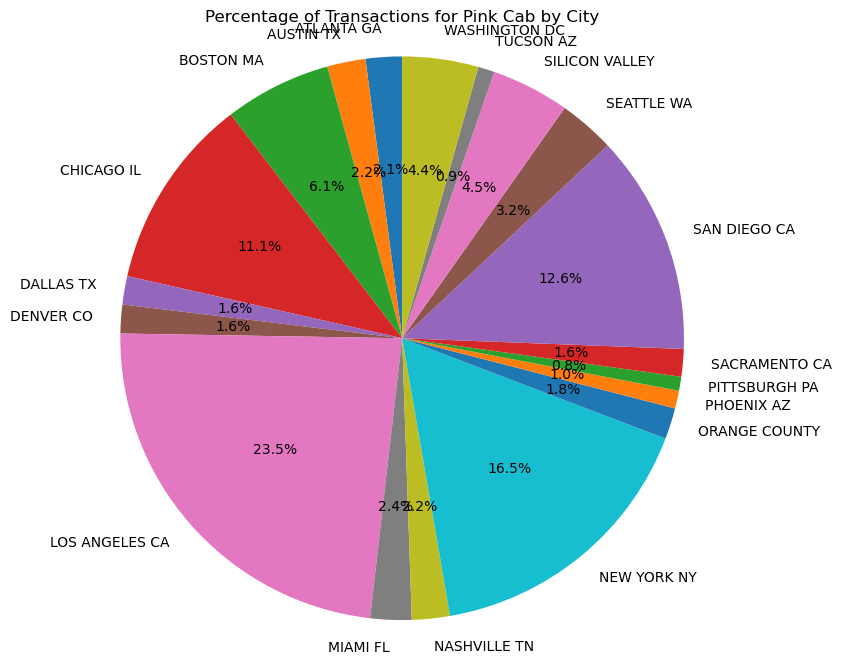

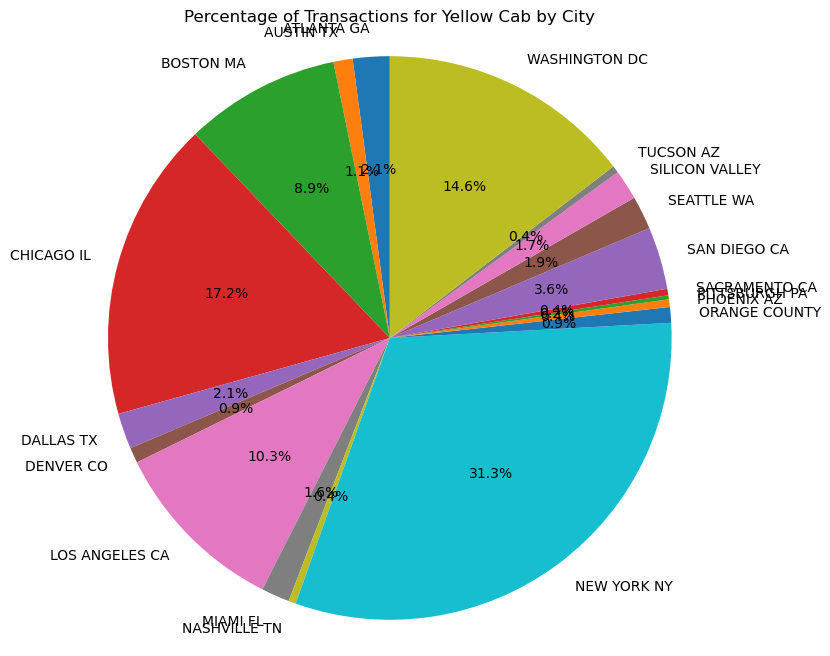

In [100]:
#now lets visualize the user activity for both company. yellow company first.
# Plot the pie chart for Pink Cab
fig, ax1 = plt.subplots(figsize=(8, 8))
ax1.pie(city_pink_cab, labels=city_pink_cab.index, autopct='%1.1f%%', startangle=90)
ax1.set_title('Percentage of Transactions for Pink Cab by City')
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Plot the pie chart for Yellow Cab
fig, ax2 = plt.subplots(figsize=(8, 8))
ax2.pie(city_yellow_cab, labels=city_yellow_cab.index, autopct='%1.1f%%', startangle=90)
ax2.set_title('Percentage of Transactions for Yellow Cab by City')
ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

plt.show()
plt.show()

In [101]:
#for yellow cab company, New York City is the most active city with %31 followed by Chicago %17 and Washington %15.
#On the other hand, Los Angeles %23 is the most active city for the pink cab company followed by New York %17 and San Diego %15.

In [102]:
#now lets see the price distribution based on the genders for each company to see if there is price difference between the
#companies according to the gender of customer.

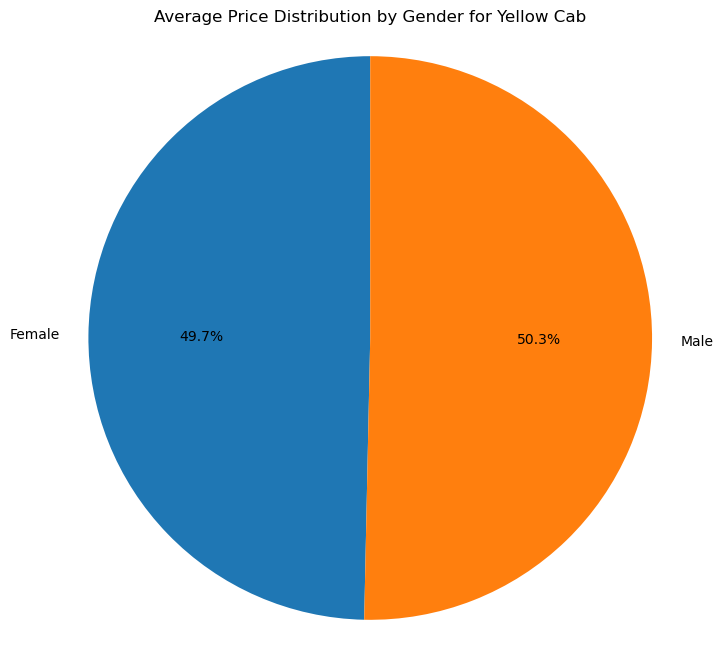

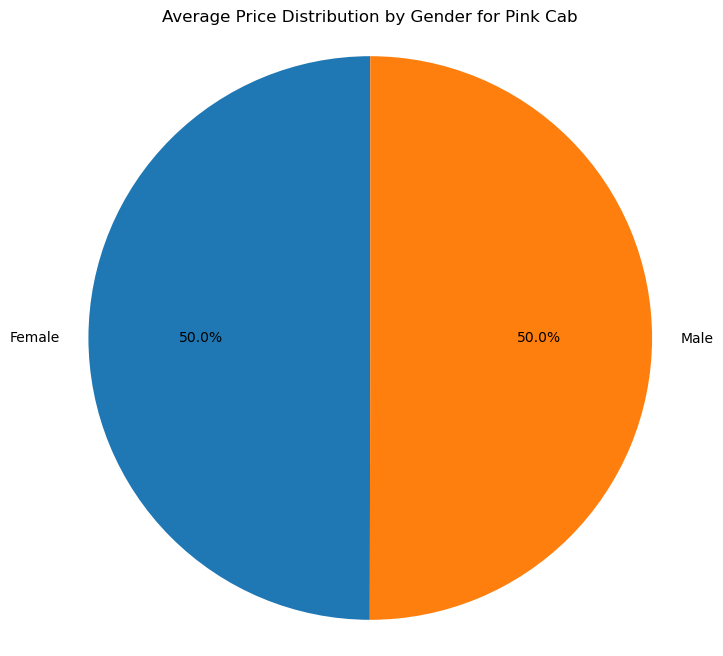

In [103]:
gender_yellow_cab=master_data[master_data.Company=='Yellow Cab'].groupby('Gender').Price_Charged.mean()
gender_pink_cab=master_data[master_data.Company=='Pink Cab'].groupby('Gender').Price_Charged.mean()

fig, ax1 = plt.subplots(figsize=(8, 8))
ax1.pie(gender_yellow_cab, labels=gender_yellow_cab.index, autopct='%1.1f%%', startangle=90)
ax1.set_title('Average Price Distribution by Gender for Yellow Cab')
ax1.axis('equal')  

fig, ax2 = plt.subplots(figsize=(8, 8))
ax2.pie(gender_pink_cab, labels=gender_pink_cab.index, autopct='%1.1f%%', startangle=90)
ax2.set_title('Average Price Distribution by Gender for Pink Cab')
ax2.axis('equal') 

plt.show()

In [104]:
#we see that yellow cab company charges slightly less price than the pink company for the females. 
#on the other hand, there is no difference in the charged prices based on the genders for the pink cab company.

C:\Users\BatuhanYILMAZ\AppData\Local\Temp\ipykernel_5300\2343151432.py:9: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_gender = yellow_cab_gender.append(pink_cab_gender)


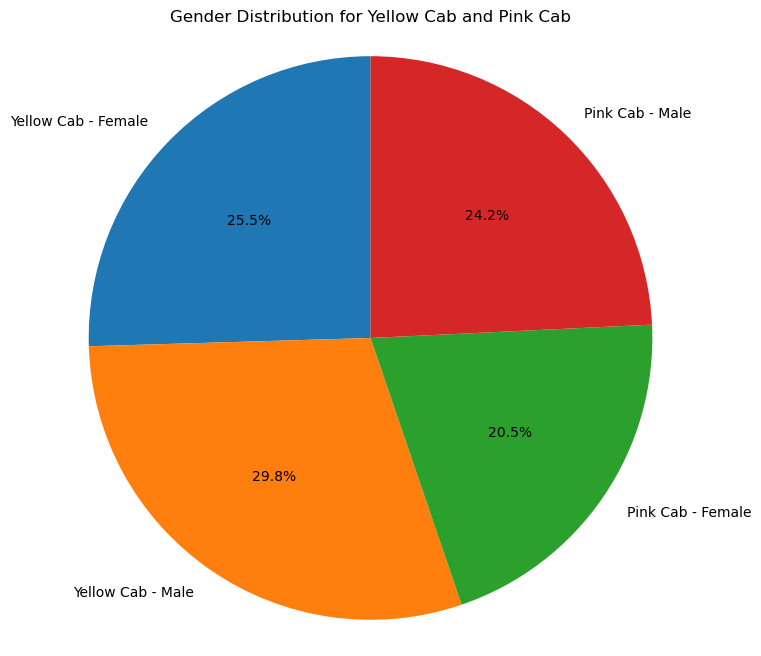

In [105]:
#this time, lets see the gender distribution according to the companies to understand people from which gender
# are more likely to choose one company over the other one.
gender_cab = master_data.groupby(['Company', 'Gender']).Customer_ID.nunique()
yellow_cab_gender = gender_cab['Yellow Cab']
pink_cab_gender = gender_cab['Pink Cab']

fig, ax = plt.subplots(figsize=(8, 8))

combined_gender = yellow_cab_gender.append(pink_cab_gender)

labels = ['Yellow Cab - Female', 'Yellow Cab - Male', 'Pink Cab - Female', 'Pink Cab - Male']

ax.pie(combined_gender, labels=labels, autopct='%1.1f%%', startangle=90)
ax.set_title('Gender Distribution for Yellow Cab and Pink Cab')
ax.axis('equal')

plt.show()

In [106]:
#now to find to profit obtained by the companies we need the difference between the charged price and original cost of the trip.
master_data['Margin'] = master_data['Price_Charged'] - master_data['Cost_of_Trip']
master_data

,Transaction_ID,Customer_ID,City,Company,KM_Travelled,Price_Charged,Cost_of_Trip,Year,Month,Payment_Mode,Gender,Age,Income,Population,Users,Margin
0,10000011,29290,ATLANTA GA,Pink Cab,30.45,370.95,313.6350,2016,1,Card,Male,28,10813,"814,885","24,701",57.3150
1,10000012,27703,ATLANTA GA,Pink Cab,28.62,358.52,334.8540,2016,1,Card,Male,27,9237,"814,885","24,701",23.6660
2,10000013,28712,ATLANTA GA,Pink Cab,9.04,125.20,97.6320,2016,1,Cash,Male,53,11242,"814,885","24,701",27.5680
3,10000014,28020,ATLANTA GA,Pink Cab,33.17,377.40,351.6020,2016,1,Cash,Male,23,23327,"814,885","24,701",25.7980
4,10000015,27182,ATLANTA GA,Pink Cab,8.73,114.62,97.7760,2016,1,Card,Male,33,8536,"814,885","24,701",16.8440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10440101,52392,WASHINGTON DC,Yellow Cab,4.80,69.24,63.3600,2018,1,Cash,Male,24,15651,"418,859","127,001",5.8800
359388,10440104,53286,WASHINGTON DC,Yellow Cab,8.40,113.75,106.8480,2018,1,Cash,Male,32,6528,"418,859","127,001",6.9020
359389,10440105,52265,WASHINGTON DC,Yellow Cab,27.75,437.07,349.6500,2018,1,Cash,Male,56,7966,"418,859","127,001",87.4200
359390,10440106,52175,WASHINGTON DC,Yellow Cab,8.80,146.19,114.0480,2018,1,Card,Male,32,6423,"418,859","127,001",32.1420


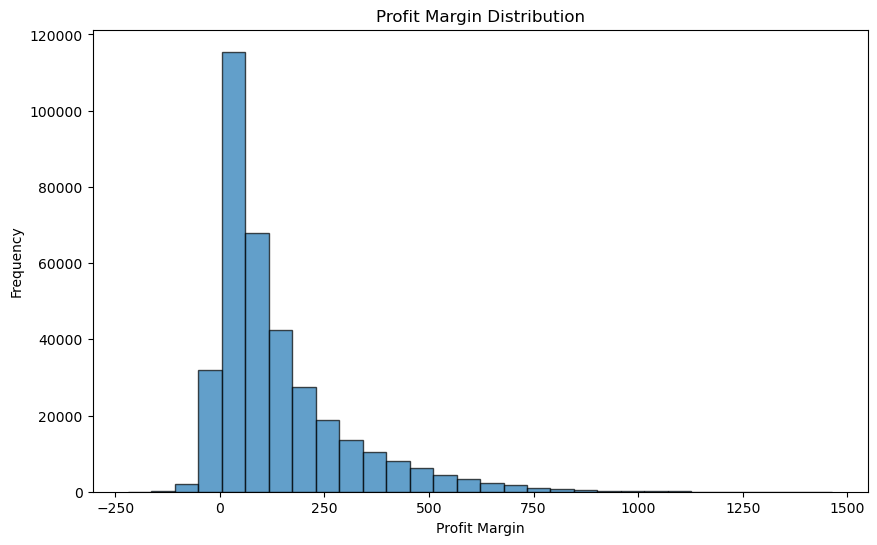

In [107]:
# roughly, we can see the margin distribution to see mostly how much profit is obtained out of all transactions.
plt.figure(figsize=(10, 6))
plt.hist(master_data['Margin'], bins=30, edgecolor='black', alpha=0.7)
plt.xlabel('Profit Margin')
plt.ylabel('Frequency')
plt.title('Profit Margin Distribution')
plt.show()

In [108]:
# to better analyze to margin, we need to find the correlation with the feature that most effects the margin value.(expected
# to see price_charged since it is the final amount requested from the customer)


In [109]:
#to do so, lets aggregate all the numerical columns of the master_data dataset by creating a new temp dataset
# and try to find out the variable that most effects the margin value.
temp = master_data[['KM_Travelled','Price_Charged','Cost_of_Trip','Month','Year','Age','Income','Margin']]
temp.corr()

,KM_Travelled,Price_Charged,Cost_of_Trip,Month,Year,Age,Income,Margin
KM_Travelled,1.000000,0.835753,0.981848,-0.001903,-0.001072,-0.000369,-0.000544,0.462768
Price_Charged,0.835753,1.000000,0.859812,-0.061116,-0.036409,-0.003084,0.003228,0.864154
Cost_of_Trip,0.981848,0.859812,1.000000,-0.008370,-0.001773,-0.000189,-0.000633,0.486056
Month,-0.001903,-0.061116,-0.008370,1.000000,-0.030490,-0.002226,0.000322,-0.096352
Year,-0.001072,-0.036409,-0.001773,-0.030490,1.000000,-0.000579,-0.001617,-0.060567
Age,-0.000369,-0.003084,-0.000189,-0.002226,-0.000579,1.000000,0.003907,-0.005093
Income,-0.000544,0.003228,-0.000633,0.000322,-0.001617,0.003907,1.000000,0.006148
Margin,0.462768,0.864154,0.486056,-0.096352,-0.060567,-0.005093,0.006148,1.000000


<Axes: >

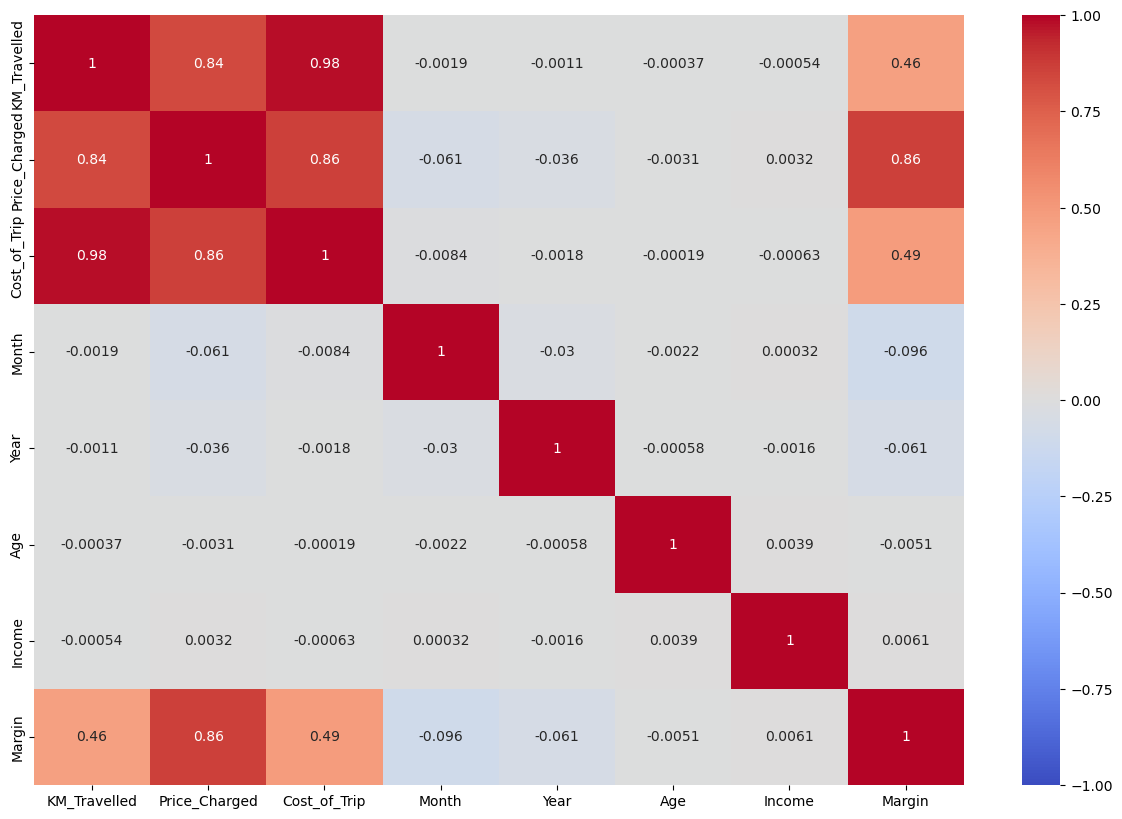

In [110]:
# margin has a strong correlation with price_charged, but to see better, lets create a heatmap.
plt.figure(figsize=(15,10))
sns.heatmap(temp.corr(),annot=True,vmin=-1,vmax=1,cmap='coolwarm')

In [111]:
#now , we can better see that there is a strong (0.86) positive correlation between Price_Charged and Margin columns.

In [112]:
# we can find the average margin value for the most crowded city and with the most busy time interval of the year 
# (which is month 12) # to see what is the maximum benefit that can be obtained during highest active time of the year
City_margin = master_data[master_data.Month==12].groupby('City').Margin.mean()
City_margin

City
ATLANTA GA         95.844236
AUSTIN TX          90.535487
BOSTON MA          61.158200
CHICAGO IL         49.166594
DALLAS TX         107.653009
DENVER CO         111.229893
LOS ANGELES CA     78.671170
MIAMI FL           98.341176
NASHVILLE TN       78.562585
NEW YORK NY       256.663241
ORANGE COUNTY      71.696141
PHOENIX AZ         72.779471
PITTSBURGH PA      50.946547
SACRAMENTO CA      23.995713
SAN DIEGO CA       67.587428
SEATTLE WA         75.043692
SILICON VALLEY    161.907324
TUCSON AZ          83.594826
WASHINGTON DC      60.778328
Name: Margin, dtype: float64

In [113]:
#now lets choose the most crowded and active city at the time of month 12
yellow_cab_data = master_data[(master_data['Company'] == 'Yellow Cab') & (master_data['City'] == 'NEW YORK NY')]
pink_cab_data = master_data[(master_data['Company'] == 'Pink Cab') & (master_data['City'] == 'NEW YORK NY')]

yellow_cab_avg = yellow_cab_data.groupby(['Year', 'Month']).agg({'Margin': 'mean', 'Transaction_ID': 'count'})
pink_cab_avg = pink_cab_data.groupby(['Year', 'Month']).agg({'Margin': 'mean', 'Transaction_ID': 'count'})

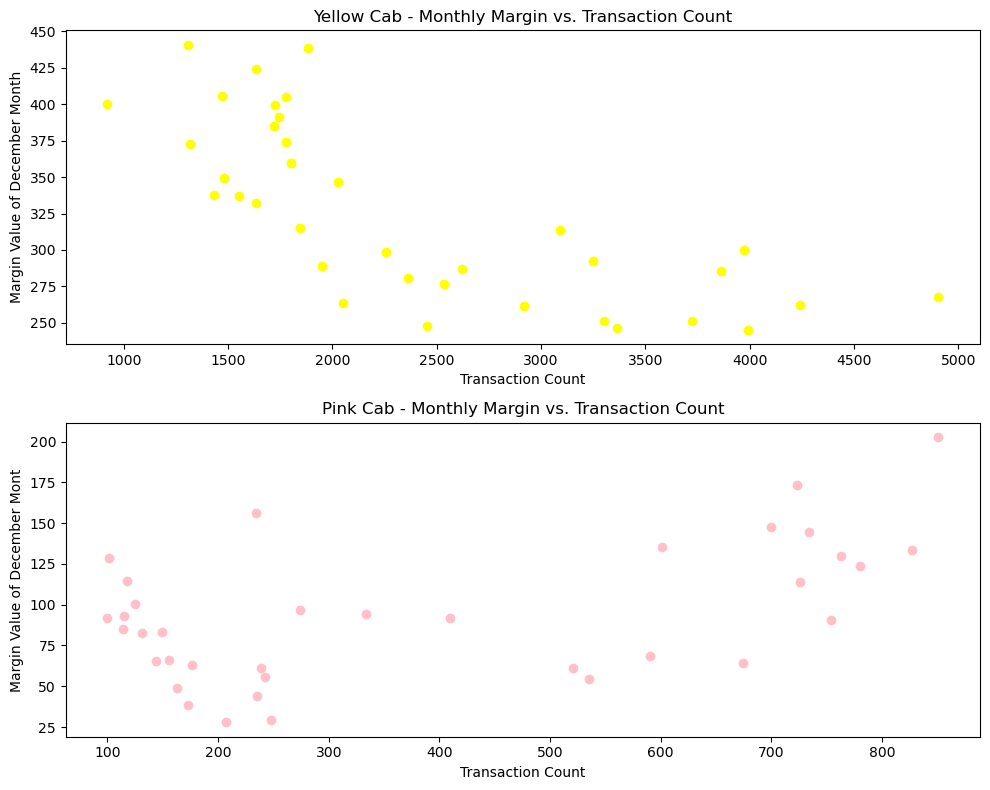

In [114]:
yellow_cab_avg = yellow_cab_data.groupby(['Year', 'Month']).agg({'Margin': 'mean', 'Transaction_ID': 'count'})
pink_cab_avg = pink_cab_data.groupby(['Year', 'Month']).agg({'Margin': 'mean', 'Transaction_ID': 'count'})

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))
ax1.scatter(yellow_cab_avg['Transaction_ID'], yellow_cab_avg['Margin'] , color = 'yellow')
ax1.set_xlabel('Transaction Count')
ax1.set_ylabel('Margin Value of December Month')
ax1.set_title('Yellow Cab - Monthly Margin vs. Transaction Count')

ax2.scatter(pink_cab_avg['Transaction_ID'], pink_cab_avg['Margin'] , color = 'pink')
ax2.set_xlabel('Transaction Count')
ax2.set_ylabel('Margin Value of December Mont')
ax2.set_title('Pink Cab - Monthly Margin vs. Transaction Count')

plt.tight_layout()
plt.show()

In [115]:
#as the number of transactions increase, the margin value decrease for the yellow cab company.
#on the other hand, as the number of transactions increase, the margin value tends to increase too for the pink cab company.

#now we have enough insight about data to come up with hypotheses.

In [116]:
# Null: Average margin value does not change depending on the city for both pink cab and yellow cab companies
import scipy.stats as stats
# top 2 active cities for yellow cab and pink cab companies can be taken as reference respectively.

best_active_city = master_data[(master_data.City=='NEW YORK NY')&(master_data.Company=='Yellow Cab')].groupby('Transaction_ID').Margin.mean()
second_active_city = master_data[(master_data.City=='CHICAGO IL')&(master_data.Company=='Yellow Cab')].groupby('Transaction_ID').Margin.mean()

_, p_value = stats.ttest_ind(best_active_city.values, second_active_city.values, equal_var=True)
if p_value < 0.05:
    print("Reject the null hypothesis.")
    print("There is a significant difference in margins depending on the city for Yellow Cab.")
else:
    print("Fail to reject the null hypothesis.")
    print("There is no significant difference in margins depending on the city for Yellow Cab.")
    
print(f"The P value is: {p_value}")

Reject the null hypothesis.
There is a significant difference in margins depending on the city for Yellow Cab.
The P value is: 0.0


In [117]:
#For yellow cab, there is a significant difference in margin values depending on the city of the transaction.

In [118]:
best_active_city = master_data[(master_data.City=='LOS ANGELES CA')&(master_data.Company=='Pink Cab')].groupby('Transaction_ID').Margin.mean()
second_active_city = master_data[(master_data.City=='NEW YORK NY')&(master_data.Company=='Pink Cab')].groupby('Transaction_ID').Margin.mean()

_, p_value = stats.ttest_ind(best_active_city.values, second_active_city.values, equal_var=True)
if p_value < 0.05:
    print("Reject the null hypothesis.")
    print("There is a significant difference in margins depending on the city for Pink Cab.")
else:
    print("Fail to reject the null hypothesis.")
    print("There is no significant difference in margins depending on the city for Pink Cab.")
    
print(f"The P value is: {p_value}")

Reject the null hypothesis.
There is a significant difference in margins depending on the city for Pink Cab.
The P value is: 0.0


In [119]:
#For pink cab, there is a significant difference in margins depending on the city of the transaction

In [120]:
# Null: Average margin value does not change depending on the payment method for both pink and yellow cab companies.

In [121]:
card = master_data[(master_data.Payment_Mode=='Card')&(master_data.Company=='Yellow Cab')].groupby('Transaction_ID').Margin.mean()
cash = master_data[(master_data.Payment_Mode=='Cash')&(master_data.Company=='Yellow Cab')].groupby('Transaction_ID').Margin.mean()

_, p_value = stats.ttest_ind(card.values, cash.values, equal_var=True)
if p_value < 0.05:
    print("Reject the null hypothesis.")
    print("There is a significant difference in margins depending on the payment method for Yellow Cab.")
else:
    print("Fail to reject the null hypothesis.")
    print("There is no significant difference in margins depending on the payment method for Yellow Cab.")
    
print(f"The P value is: {p_value}")

Fail to reject the null hypothesis.
There is no significant difference in margins depending on the payment method for Yellow Cab.
The P value is: 0.2933060638298729


In [122]:
# For yellow cab, there is no significant difference depending on the payment method of the customer.

In [123]:
card = master_data[(master_data.Payment_Mode=='Card')&(master_data.Company=='Pink Cab')].groupby('Transaction_ID').Margin.mean()
cash = master_data[(master_data.Payment_Mode=='Cash')&(master_data.Company=='Pink Cab')].groupby('Transaction_ID').Margin.mean()

_, p_value = stats.ttest_ind(card.values, cash.values, equal_var=True)
if p_value < 0.05:
    print("Reject the null hypothesis.")
    print("There is a significant difference in margins depending on the payment method for Pink Cab.")
else:
    print("Fail to reject the null hypothesis.")
    print("There is no significant difference in margins depending on the payment method for Pink Cab.")
    
print(f"The P value is: {p_value}")

Fail to reject the null hypothesis.
There is no significant difference in margins depending on the payment method for Pink Cab.
The P value is: 0.7900465828793286


In [124]:
# For pink cab, there is no significant difference in average margin values depending on the payment method of the customer.

In [125]:
# Null: Average margin value does not change depending on the gender for both pink cab and yellow cab companies
import scipy.stats as stats

female = master_data[(master_data.Gender=='Female')&(master_data.Company=='Yellow Cab')].groupby('Transaction_ID').Margin.mean()
male = master_data[(master_data.Gender=='Male')&(master_data.Company=='Yellow Cab')].groupby('Transaction_ID').Margin.mean()

_, p_value = stats.ttest_ind(female.values, male.values, equal_var=True)
if p_value < 0.05:
    print("Reject the null hypothesis.")
    print("There is a significant difference in margins between genders for Yellow Cab.")
else:
    print("Fail to reject the null hypothesis.")
    print("There is no significant difference in margins between genders for Yellow Cab.")
    
print(f"The P value is: {p_value}")

Reject the null hypothesis.
There is a significant difference in margins between genders for Yellow Cab.
The P value is: 6.060473042494056e-25


In [126]:
#For yellow cab company, there is a significant difference in margin value between the genders.

In [127]:
#now, lets check it for the pink cab company.
female = master_data[(master_data.Gender=='Female')&(master_data.Company=='Pink Cab')].groupby('Transaction_ID').Margin.mean()
male = master_data[(master_data.Gender=='Male')&(master_data.Company=='Pink Cab')].groupby('Transaction_ID').Margin.mean()

_, p_value = stats.ttest_ind(female.values, male.values, equal_var=True)
if p_value < 0.05:
    print("Reject the null hypothesis.")
    print("There is a significant difference in margins between genders for Pink Cab.")
else:
    print("Fail to reject the null hypothesis.")
    print("There is no significant difference in margins between genders for Pink Cab.")
    
print(f"The P value is: {p_value}")

Fail to reject the null hypothesis.
There is no significant difference in margins between genders for Pink Cab.
The P value is: 0.11515305900425798


In [128]:
#For pink cab company, there is no significant difference in margin value between the genders. 

In [129]:
# Null: Average margin value does not change depending on the age for both pink cab and yellow cab companies
smaller_than_some_value = master_data[(master_data.Age<=50)&(master_data.Company=='Yellow Cab')].groupby('Transaction_ID').Margin.mean()
greater_than_some_value = master_data[(master_data.Age>50)&(master_data.Company=='Yellow Cab')].groupby('Transaction_ID').Margin.mean()

_, p_value = stats.ttest_ind(smaller_than_some_value.values, greater_than_some_value.values, equal_var=True)
if p_value < 0.05:
    print("Reject the null hypothesis.")
    print("There is a significant difference in margins depending on the Age of customers for Yellow Cab.")
else:
    print("Fail to reject the null hypothesis.")
    print("There is no significant difference in margins depending on the Age of customers for Yellow Cab.")
    
print(f"The P value is: {p_value}")

Reject the null hypothesis.
There is a significant difference in margins depending on the Age of customers for Yellow Cab.
The P value is: 6.4942568177993685e-09


In [130]:
#For yellow cab, there is a significant difference in margin values depending on the age of the customers.

In [131]:
smaller_than_some_value = master_data[(master_data.Age<=50)&(master_data.Company=='Pink Cab')].groupby('Transaction_ID').Margin.mean()
greater_than_some_value = master_data[(master_data.Age>50)&(master_data.Company=='Pink Cab')].groupby('Transaction_ID').Margin.mean()

_, p_value = stats.ttest_ind(smaller_than_some_value.values, greater_than_some_value.values, equal_var=True)
if p_value < 0.05:
    print("Reject the null hypothesis.")
    print("There is a significant difference in margins depending on the Age of customers for Pink Cab.")
else:
    print("Fail to reject the null hypothesis.")
    print("There is no significant difference in margins depending on the Age of customers for Pink Cab.")
    
print(f"The P value is: {p_value}")

Fail to reject the null hypothesis.
There is no significant difference in margins depending on the Age of customers for Pink Cab.
The P value is: 0.32817487547980695


In [132]:
#For pink cab, there is no significant difference in margin values depending on the age of the customers.

In [133]:
# Null: Average margin does not change depending on the month transaction is performed for both yellow and pink cab company

# Taking advantage of us_holiday datasets, we will consider the most and least holiday contains month 
# seperately to prove the truthness of hypothesis.

least_holiday_month = master_data[(master_data.Month==6)&(master_data.Company=='Yellow Cab')].groupby('Transaction_ID').Margin.mean()
most_holiday_month = master_data[(master_data.Month==12)&(master_data.Company=='Yellow Cab')].groupby('Transaction_ID').Margin.mean()

_, p_value = stats.ttest_ind(least_holiday_month.values, most_holiday_month.values, equal_var=True)
if p_value < 0.05:
    print("Reject the null hypothesis.")
    print("There is a significant difference in margins depending on the month of the transaction for Yellow Cab.")
else:
    print("Fail to reject the null hypothesis.")
    print("There is no significant difference in margins depending on the month of the transaction for Yellow Cab.")
    
print(f"The P value is: {p_value}")

Reject the null hypothesis.
There is a significant difference in margins depending on the month of the transaction for Yellow Cab.
The P value is: 1.993753103466109e-183


In [134]:
#For yellow cab, there is a significant difference in margins depending on the period of the year.

In [135]:
least_holiday_month = master_data[(master_data.Month==6)&(master_data.Company=='Pink Cab')].groupby('Transaction_ID').Margin.mean()
most_holiday_month = master_data[(master_data.Month==12)&(master_data.Company=='Pink Cab')].groupby('Transaction_ID').Margin.mean()

_, p_value = stats.ttest_ind(least_holiday_month.values, most_holiday_month.values, equal_var=True)
if p_value < 0.05:
    print("Reject the null hypothesis.")
    print("There is a significant difference in margins depending on the month of the transaction for Pink Cab.")
else:
    print("Fail to reject the null hypothesis.")
    print("There is no significant difference in margins depending on the month of the transaction for Pink Cab.")
    
print(f"The P value is: {p_value}")

Reject the null hypothesis.
There is a significant difference in margins depending on the month of the transaction for Pink Cab.
The P value is: 1.9616227830629913e-293


In [136]:
#For pink cab, there is a significant difference in margins depending on the period of the year.